# 신경망 모델 훈련

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 손실 곡선

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
def model_fn(a_layer=None): # 매개변수를 지정하지 않으면 Flatten - 밀집층 - 출력층으로 구성된 모델, 지정하면 밀집층 - 출력층 사이에 새 층이 삽입됨
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [4]:
model = model_fn()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0) # verbose에 0을 지정하면 훈련하는 과정이 표시되지 않음

In [6]:
print(history.history.keys()) # accuracy는 metircs에서 지정해줬기 때문에 history에 저장되었음

dict_keys(['loss', 'accuracy'])


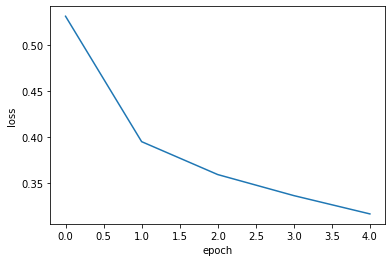

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

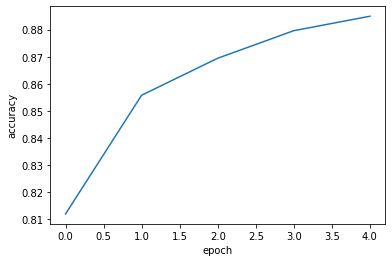

In [8]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0) # 에포크를 20회로 증가시킨다면?

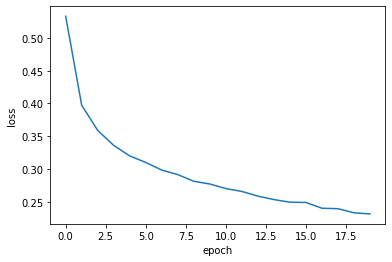

In [10]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

과대적합된 결과

## 검증 손실

In [11]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target)) # validation_data에 검증 세트를 전달하면 검증 손실과 정확도를 얻을 수 있음

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


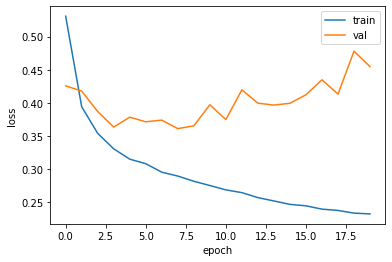

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target)) # 옵티마이저를 adam으로 바꾸면?

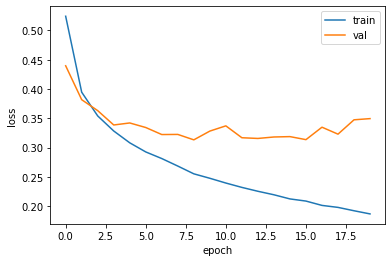

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

조금 더 나은 결과를 가져옴

## 드롭아웃

In [16]:
model = model_fn(keras.layers.Dropout(0.3)) # 랜덤으로 은닉층의 출력을 0으로 만듦

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

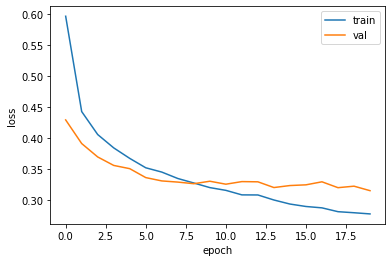

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show() # 과대적합을 방지하였음

## 모델 저장과 복원

In [19]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [20]:
model.save_weights('model-weights.h5') # save_weights는 모델의 파라미터를 저장

In [21]:
model.save('model-whole.h5') # save는 모델의 파라미터와 구조를 저장

In [22]:
!ls -al *.h5 # ls : 디렉토리에 있는 내용을 확인, -a : 숨겨진 파일이나 디렉토리도 보여줌, -l : 상세하게 출력

-rw-r--r-- 1 root root 333448 May 28 11:38 model-weights.h5
-rw-r--r-- 1 root root 982664 May 28 11:38 model-whole.h5


In [23]:
model = model_fn(keras.layers.Dropout(0.3)) # load_weights를 사용할 때는 모델의 구조를 원래 모델의 구조와 동일하게 만들어야 함

model.load_weights('model-weights.h5')

In [24]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1) # 클래스들 중 가장 높은 예측치를 가진 것을 반환
print(np.mean(val_labels == val_target)) # 레이블과 실제 타깃 값이 같다면 1, 다르다면 0을 출력한 것을 합하여 정확도를 계산

0.8825


In [25]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target) # load_model로 모델을 호출한 경우 옵티마이저까지 모두 복원하기 때문에 compile하지 않고도 evaluate를 사용할 수 있음

375/375 [==============================] - 1s 2ms/step - loss: 0.3327 - accuracy: 0.8825


[0.33268266916275024, 0.8824999928474426]

## 콜백

In [26]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True) # 에포크 단위로 모델을 저장, 가장 좋은 결과가 있는 모델을 저장

model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [27]:
model = keras.models.load_model('best-model.h5') # 가장 좋은 결과를 갖는 모델을 불러옴

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3148 - accuracy: 0.8902


[0.31479981541633606, 0.8901666402816772]

In [28]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True) # patience=2 : 2회 이상 검증 세트의 손실 값이 개선되지 않으면 훈련을 중지

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # callbacks에 리스트 형태로 할당

In [29]:
print(early_stopping_cb.stopped_epoch)  # 훈련을 멈춘 에포크를 반환, 이 값에서 patience 값을 뺐을 때 가장 좋은 값을 갖는 모델을 얻을 수 있음

9


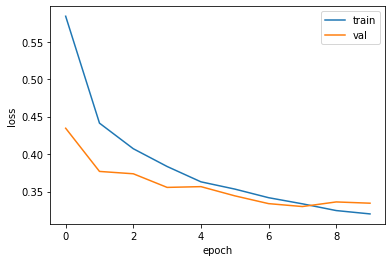

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [31]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3301 - accuracy: 0.8815


[0.330147922039032, 0.8815000057220459]